In [51]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
from attention.utils.utilities import *
from attention.params import *
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DETECT FACES ON GROUP IMAGE (splittmng image for better detection)

### Loading image

In [52]:
image_name = "IMG_3288 2 copy.jpg"
image_path = os.path.join(os.path.expanduser('~'), "Desktop", image_name)

In [53]:
image = read_image(image_path)
# plt.imshow(image)

[ WARN:0@1858.804] global loadsave.cpp:244 findDecoder imread_('/Users/Amine/Desktop/IMG_3288 2 copy.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### Splitting in multiple crops

#### Defining number of crops along the axes

In [ ]:
n_split_w = 12
n_split_h = 12

#### Cropping the image


In [ ]:
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

### Generating bboxes and processing them 

#### Listing the bbox coordinates in the crops

In [ ]:
# as per the crop coordinate system and the absolute coordinate system
bbox_crop_list = []
bbox_crop_list_absolute = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_absolute = reconstruct_coord(crop, coord_set)
    bbox_crop_list_absolute.append(coord_set_absolute)
bbox_crop_list_absolute

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613}],
 [{'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569}],
 [{'x1': 1317, 'x2': 1388, 'y1': 1476, 'y2': 1571}],
 [],
 [],
 [],
 [],
 [{'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529}],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 900, 'y1': 1494, 'y2': 1602}],
 [{'x1': 1301, 'x2': 1403, 'y1': 1491, 'y2': 1557}],
 [{'x1': 1315, 'x2': 1388, 'y1': 1488, 'y2': 1559}],
 [],
 [],
 [{'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605}],
 [{'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508}],
 [],
 [{'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

#### Drawing the bbox on each crop 


In [ ]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = annotate_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

#### Eliminating duplicate bboxes

In [ ]:
bbox_list = bbox_merge(bbox_crop_list_absolute)
bbox_list

[{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613},
 {'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569},
 {'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529},
 {'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605},
 {'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508},
 {'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}]

### Generating final image output

#### Drawing the unique bboxes on the original image 

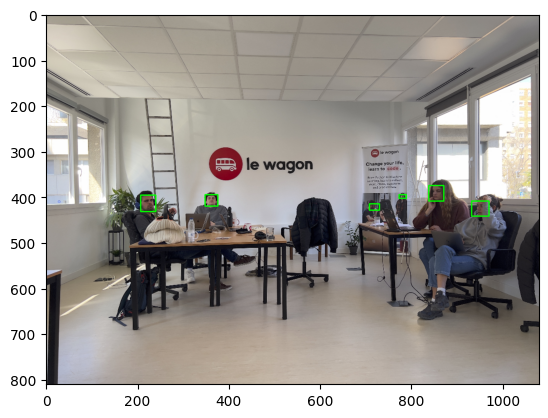

In [ ]:
image_output = annotate_bboxes(image, bbox_list)
plt.imshow(image_output)

### Saving the image output

In [ ]:
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")
save_image(image_output, image_name, output_path)

True

# DETECTING EYES AND IRIS ON FACES

### Generating faces

In [70]:
face_path = os.path.join(os.path.expanduser('~'), "Desktop", "attention_data", "face_crops", "IMG_3487_f1_0.png")
face = read_image(face_path)
# face, ratio = resize_image(face, 500)

### Generating eye and iris landmarks for one face

#### Running face mesh model on the face

In [71]:
mp_landmarks = find_landmarks(face)

#### Drawing the face mesh on the face

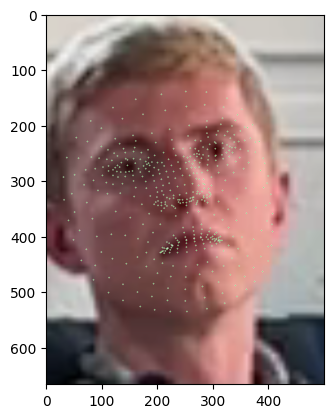

In [72]:
face_annotated = annotate_mesh(face, mp_landmarks)
plt.imshow(face_annotated)

#### Converting the Mediapipe landmark to a standard system of coordinates

In [74]:
landmark_list = convert_landmarks(face, mp_landmarks)
landmark_list

[(33, 48),
 (31, 40),
 (31, 43),
 (28, 35),
 (31, 38),
 (30, 36),
 (29, 32),
 (16, 35),
 (28, 28),
 (28, 26),
 (26, 18),
 (33, 49),
 (33, 50),
 (33, 50),
 (33, 51),
 (33, 51),
 (33, 52),
 (34, 53),
 (34, 56),
 (31, 42),
 (29, 42),
 (4, 32),
 (21, 35),
 (19, 36),
 (17, 36),
 (15, 36),
 (22, 35),
 (17, 31),
 (19, 31),
 (16, 32),
 (14, 33),
 (13, 38),
 (27, 62),
 (15, 35),
 (5, 40),
 (10, 37),
 (21, 43),
 (31, 48),
 (31, 50),
 (28, 50),
 (27, 51),
 (29, 51),
 (28, 52),
 (24, 55),
 (30, 41),
 (29, 39),
 (11, 32),
 (24, 37),
 (25, 42),
 (25, 41),
 (15, 44),
 (29, 37),
 (16, 29),
 (14, 30),
 (6, 28),
 (24, 29),
 (21, 31),
 (22, 54),
 (10, 60),
 (26, 43),
 (28, 43),
 (25, 54),
 (26, 53),
 (12, 30),
 (25, 43),
 (20, 28),
 (19, 27),
 (15, 21),
 (9, 28),
 (17, 23),
 (10, 32),
 (7, 32),
 (31, 49),
 (29, 50),
 (27, 52),
 (27, 43),
 (26, 54),
 (27, 53),
 (26, 53),
 (28, 41),
 (28, 52),
 (30, 51),
 (31, 51),
 (31, 57),
 (31, 54),
 (31, 52),
 (31, 52),
 (31, 51),
 (28, 52),
 (28, 53),
 (28, 53),
 (28

#### Defining the landmarks we want to focus on

In [75]:
# Indices of the landmarks we focus on
landmark_idx = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

In [76]:
# Extracting the coordinates of the landmarks we focus on
landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
landmark_focus_x

[(34, 31), (42, 30), (38, 30), (15, 35), (23, 33), (18, 34)]

### Generating final image output

#### Drawing the points on the face image

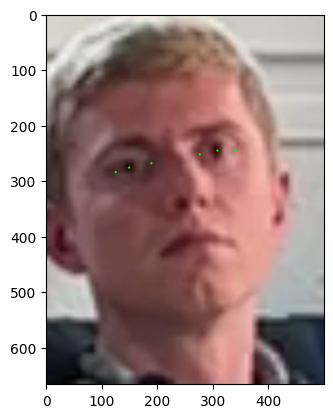

In [77]:
face_spec_lm = annotate_landmarks(face, landmark_list, landmark_idx)
plt.imshow(face_spec_lm)

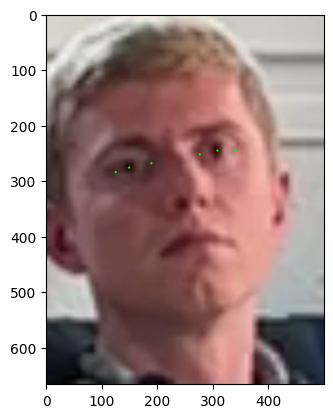

In [81]:
face_annotated, ratio = resize_image(face, 500)
landmark_focus = [landmark_list[idx] for idx in landmark_idx]
landmark_focus_resized = resize_landmarks(landmark_focus, ratio)
for landmark in landmark_focus_resized:
    cv2.circle(face_annotated, landmark, radius=2, color=(0, 255, 0), thickness=-1)
plt.imshow(face_annotated)

In [82]:
landmark

array([149, 276])

In [83]:
landmark_resized

(142, 269)

In [64]:
ratio

1

In [65]:
35 * 7.936507936507937

277.77777777777777

In [66]:
face.shape

(84, 63, 3)

[ WARN:0@1.224] global loadsave.cpp:244 findDecoder imread_('/Users/noah/Desktop/IMG_3288 2 copy.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613}],
 [{'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569}],
 [{'x1': 1317, 'x2': 1388, 'y1': 1476, 'y2': 1571}],
 [],
 [],
 [],
 [],
 [{'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529}],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 900, 'y1': 1494, 'y2': 1602}],
 [{'x1': 1301, 'x2': 1403, 'y1': 1491, 'y2': 1557}],
 [{'x1': 1315, 'x2': 1388, 'y1': 1488, 'y2': 1559}],
 [],
 [],
 [{'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605}],
 [{'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508}],
 [],
 [{'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

[{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613},
 {'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569},
 {'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529},
 {'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605},
 {'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508},
 {'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}]

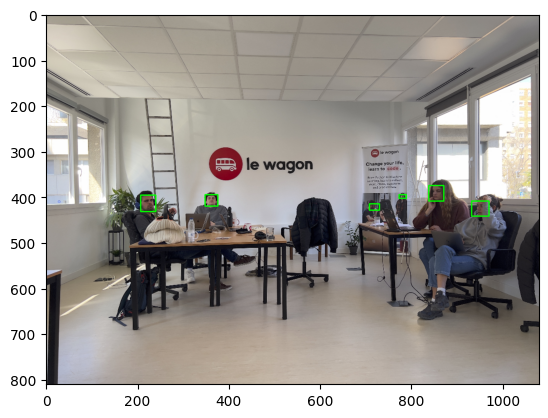

True

[(52, 55),
 (51, 41),
 (51, 47),
 (48, 35),
 (51, 38),
 (51, 36),
 (51, 31),
 (30, 35),
 (50, 26),
 (50, 22),
 (50, 12),
 (52, 56),
 (52, 57),
 (52, 57),
 (52, 58),
 (52, 58),
 (52, 59),
 (52, 61),
 (52, 65),
 (51, 43),
 (49, 44),
 (17, 30),
 (38, 36),
 (36, 37),
 (33, 37),
 (29, 36),
 (41, 35),
 (34, 28),
 (37, 28),
 (31, 29),
 (29, 31),
 (26, 38),
 (40, 72),
 (29, 35),
 (16, 41),
 (22, 37),
 (36, 45),
 (48, 54),
 (49, 57),
 (45, 56),
 (42, 58),
 (46, 58),
 (44, 59),
 (38, 63),
 (49, 41),
 (48, 39),
 (24, 28),
 (42, 39),
 (42, 44),
 (41, 43),
 (27, 47),
 (48, 36),
 (32, 23),
 (27, 25),
 (20, 23),
 (45, 25),
 (40, 29),
 (35, 61),
 (19, 70),
 (44, 45),
 (47, 46),
 (40, 61),
 (40, 61),
 (25, 23),
 (42, 46),
 (38, 23),
 (37, 21),
 (33, 14),
 (23, 24),
 (35, 18),
 (21, 27),
 (19, 29),
 (49, 56),
 (45, 57),
 (43, 58),
 (45, 46),
 (40, 61),
 (41, 61),
 (41, 61),
 (46, 43),
 (44, 59),
 (46, 58),
 (49, 58),
 (48, 65),
 (48, 61),
 (49, 60),
 (49, 59),
 (49, 58),
 (44, 59),
 (43, 60),
 (43, 60),

[(59, 33), (72, 34), (66, 33), (29, 35), (42, 33), (36, 34)]

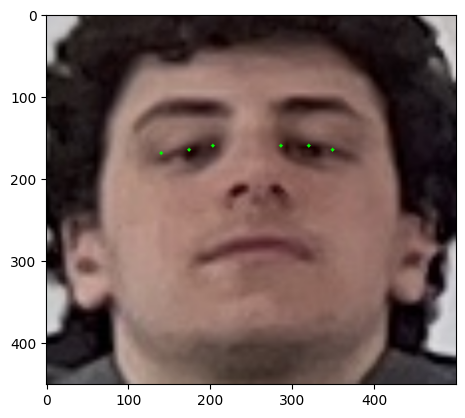

True

{'left': ('straight', 0.54), 'right': ('straight', 0.46)}

True

160


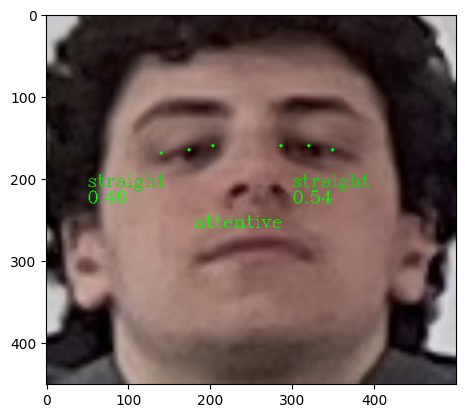

True

('No Face', nan)

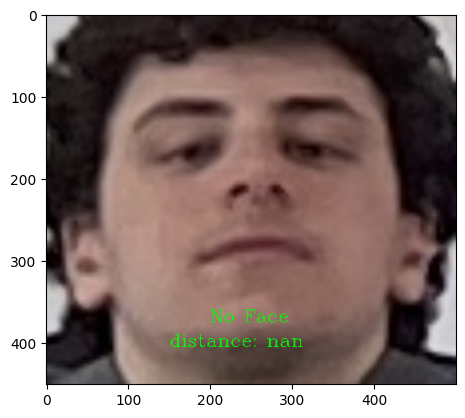

True

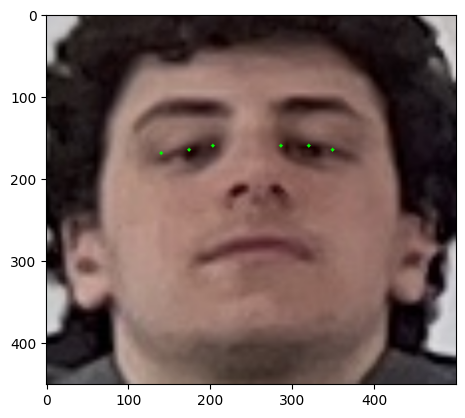

In [ ]:
face_spec_lm = annotate_landmarks(face, landmark_list, landmark_idx)
plt.imshow(face_spec_lm)

### Saving the face image output

In [ ]:
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")
face_name = 'noah_lm.jpg'
save_image(face_spec_lm, face_name, output_path)

True

## DETECTING EYES DIRECTION AND ATTENTION

### Calculating eyes direction

In [ ]:
eye_directions = detect_eye_directions(landmark_list, 0.63)
eye_directions

{'left': ('straight', 0.54), 'right': ('straight', 0.46)}

### Assessing attentiveness

In [ ]:
attention = is_attentive(eye_directions)
attention

True

### Generating final image output

#### Drawing the points and metrics on the face image

160


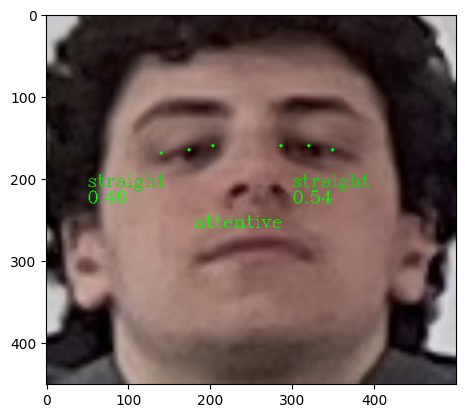

In [ ]:
prediction_left, score_left = eye_directions['left']
prediction_right, score_right = eye_directions['right']
prediction_attention = 'attentive' if attention else 'inattentive'
face_attention = annotate_iris_attention(face, landmark_list, 
                                         prediction_left, score_left, 
                                         prediction_right, score_right,
                                         prediction_attention)

plt.imshow(face_attention)

### Saving the attention image output

In [ ]:
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output-attention")
face_name = 'noah_attention.jpg'
save_image(face_attention, face_name, output_path)

True

## RECOGNIZING PEOPLE

### Training the model

In [ ]:
known_faces = [face]
known_names = ['noah']
known_encodings = train_faces(known_faces, known_names)

### Recognizing a face

In [ ]:
face_prediction = recognize_face(faces[5], known_encodings)
face_prediction

('No Face', nan)

### Generating final image output

#### Annotating name and distance on the face image

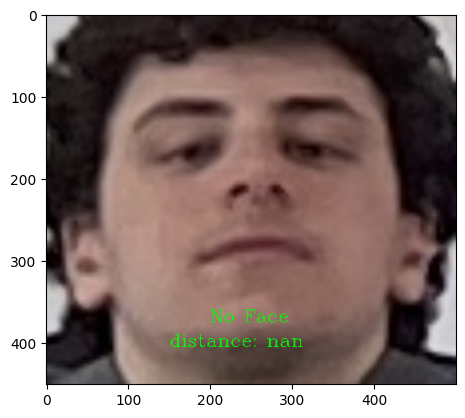

In [ ]:
prediction_name, distance = face_prediction

face_recognition = annotate_recognition(face, prediction_name, distance)

plt.imshow(face_recognition)

### Saving the attention image output

In [ ]:
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output-recognition")
face_name = 'noah_recognition.jpg'
save_image(face_recognition, face_name, output_path)

True